<a href="https://colab.research.google.com/github/santhoshsrivi/BITS/blob/main/datamining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Functions**

In [37]:
import sys
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px
import plotly.graph_objects as go
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('default')

**Data Load**

In [38]:
data = pd.read_csv("/content/Dataset.csv", header=None)

In [39]:
data.shape

(7501, 20)

In [40]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,97,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,protein bar,frozen smoothie,protein bar,mayonnaise,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [42]:
data[1]

0                 almonds
1               meatballs
2                     NaN
3                 avocado
4                    milk
              ...        
7496           light mayo
7497    frozen vegetables
7498                  NaN
7499            green tea
7500      frozen smoothie
Name: 1, Length: 7501, dtype: object

# **Data Visualization**

**- The most demanded item or Top 10**

In [43]:
data.shape[0]

7501

In [44]:
data.shape[1]

20

In [45]:
# 1.Gathering all the items of transactions into numpy Array:

transactions = []

for i in range(0,data.shape[0]):
  for j in range(0,data.shape[1]):
    transactions.append(data.values[i,j])

transactions = np.array(transactions)

# 2.Transform them into a pandas DataFrame:
df = pd.DataFrame(transactions,columns=["items"])
df["incident_count"] = 1 #put 1 for each item to make a countable table, to be able to perform groupby


# 3.Delete NaN from the dataset:
indexNames = df[df['items'] == "nan"].index
df.drop(indexNames, inplace=True)

# 4.Final Step: Make a New Appropriate Pandas DataFrame for Visualizations 
df_table = df.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()

In [46]:
df_table.head(10).style.background_gradient(cmap='Greys')

,items,incident_count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1230
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


### **Top 30 items**

In [48]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
# By Doing So, We Will Be Able To Iterate Through Array of Transactions

transaction = []

for i in range(0,data.shape[0]):
  transaction.append([str(data.values[i,j]) for j in range(0,data.shape[1])])

transaction = np.array(transaction)

#datatable to check the top 20 item

top20 = df_table["items"].head(20).values
array = []
df_top20_multiple_record_check = pd.DataFrame(columns=top20)

for i in range(0,len(top20)):
  array = []
  for j in range(0,transaction.shape[0]):
    array.append(np.count_nonzero(transaction[j]==top20[i]))
    if len(array) == len(data):
      df_top20_multiple_record_check[top20[i]] = array
    else:
      continue  

In [49]:
df_top20_multiple_record_check.head(5)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes,olive oil,frozen smoothie,turkey
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
df_top20_multiple_record_check.describe()

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes,olive oil,frozen smoothie,turkey
count,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000,7501.000000
mean,0.238368,0.179709,0.174110,0.170911,0.163978,0.132116,0.129583,0.098254,0.095321,0.095054,0.087188,0.081056,0.080389,0.079323,0.076523,0.071457,0.068391,0.065858,0.063325,0.062525
std,0.426114,0.383971,0.379229,0.376456,0.370640,0.338639,0.335866,0.297677,0.293677,0.293309,0.282130,0.272939,0.271913,0.270260,0.265851,0.257604,0.252432,0.248050,0.243563,0.242123
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**As we can see above, only Chocolate has a max value of 2. The others have max value of 1.From that reason we can say that the data is homogenous, we can proceed without any inference.**


*- Choice Analysis / Customers' First Choices*

In [51]:
# 1. Gather Only First Choice of Each Transactions into Numpy Array
# Similar Pattern to Above, Only Change is the Column Number "0" in Append Function

transaction = []

for i in range(0,data.shape[0]):
  transaction.append(data.values[i,0])

transaction = np.array(transaction)

# 2.Transform them into a DataFrame
df_first=pd.DataFrame(transaction,columns=["items"])
df_first["incident_count"] = 1

#3.Delete Nan from the dataset:
indexNames = df_first[df_first['items'] == "nan" ].index
df_first.drop(indexNames , inplace=True)

#4.making a pandas dataframe
df_table_first = df_first.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_first["food"] = "food"
df_table_first = df_table_first.truncate(before=-1, after=15)

In [52]:
fig = go.Figure(data=[go.Bar(x=df_table_first["items"],y=df_table_first["incident_count"],
                             hovertext=df_table_first["items"], text=df_table_first["incident_count"], textposition="outside")])
fig.update_traces(marker_color='rgb(158,202,225)',marker_line_color='rgb(8,48,107)',
                  marker_line_width = 1.5, opacity = 0.65)
fig.update_layout(title_text='Customers First choices',template = 'plotly_dark',)
fig.show()

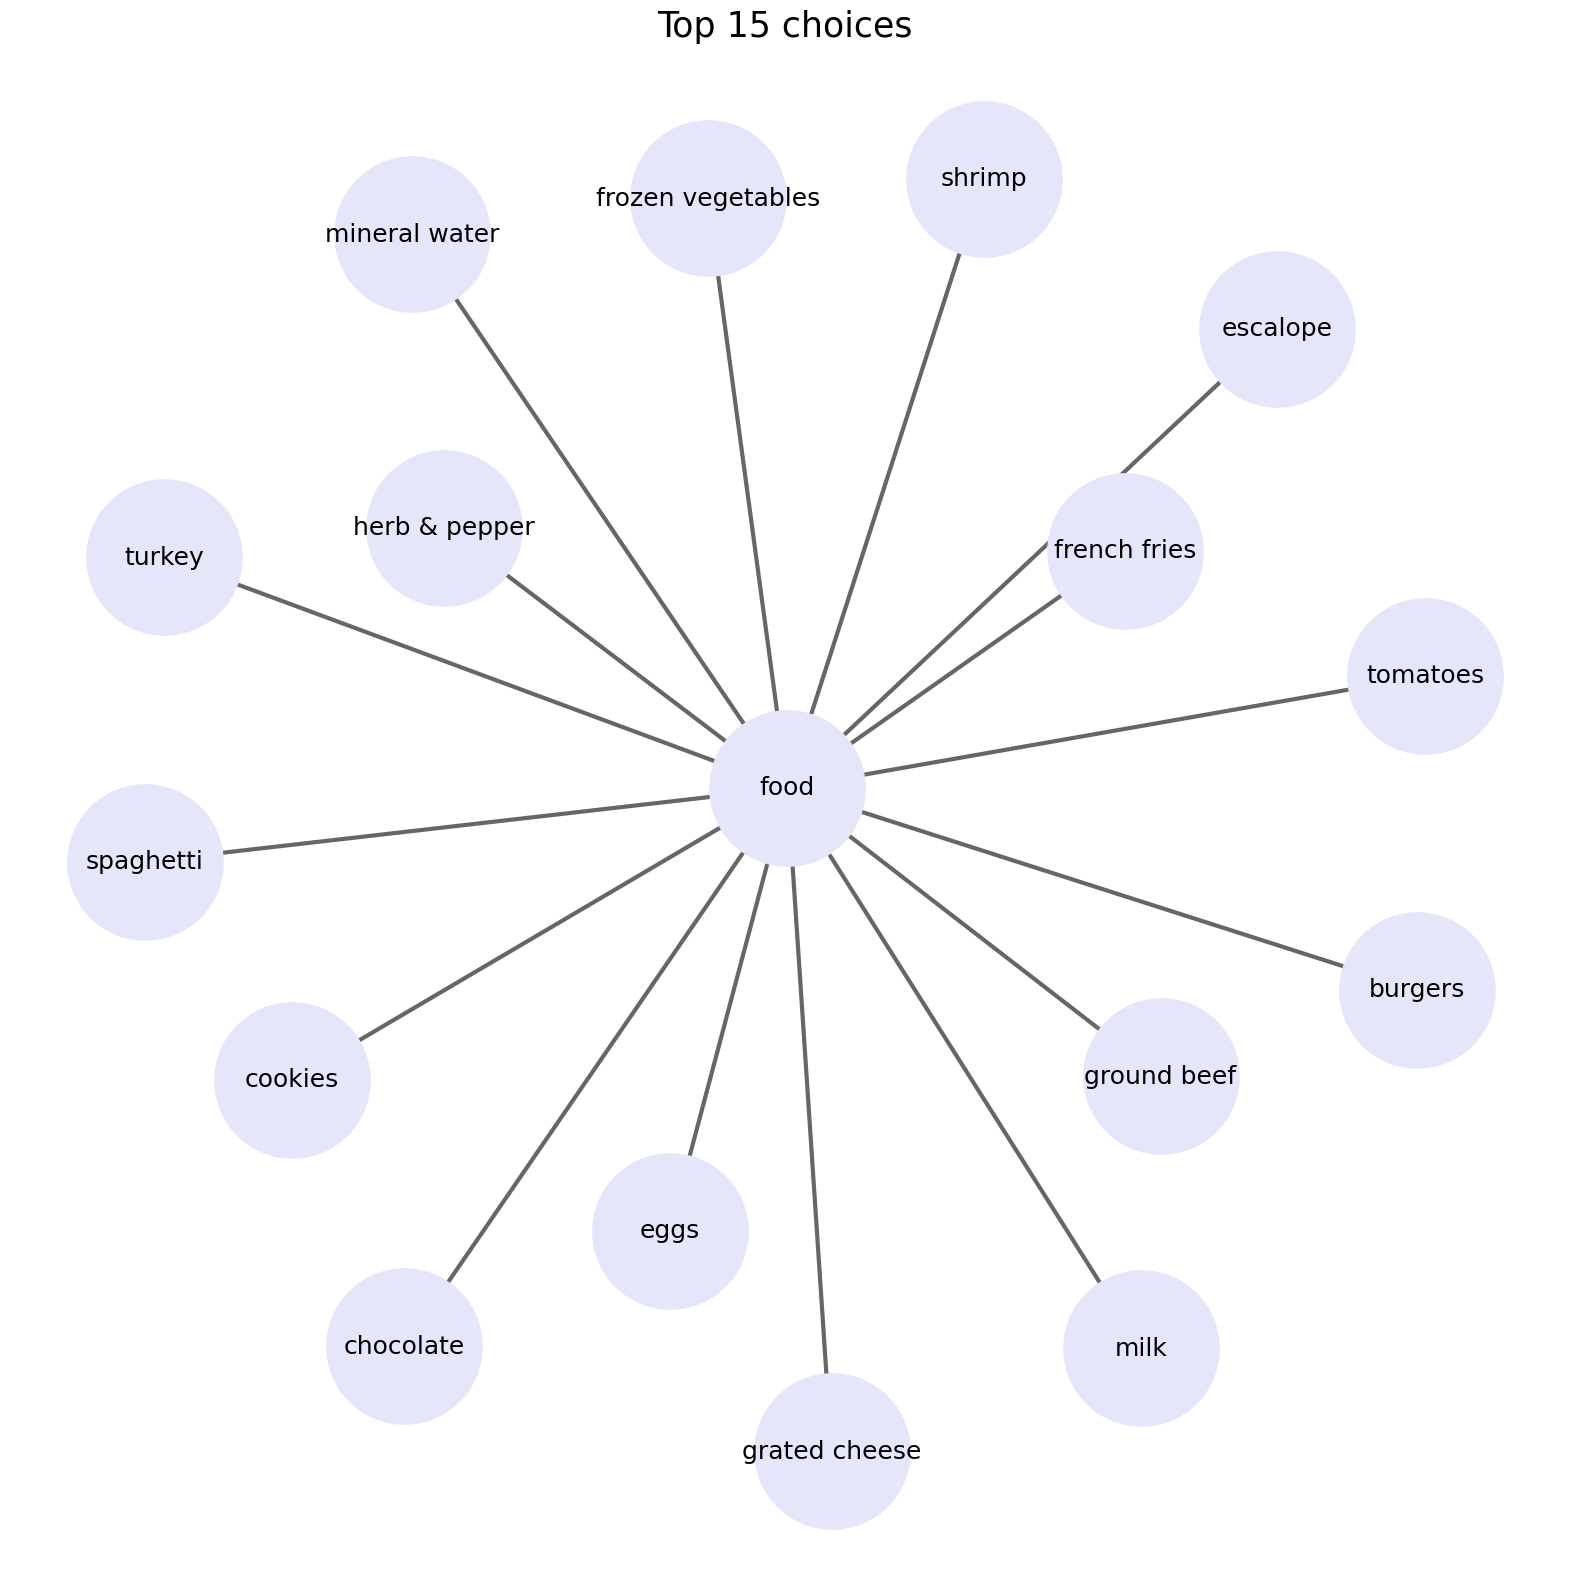

In [53]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20,20)
first_choice = nx.from_pandas_edgelist(df_table_first, source = 'food', target = "items", edge_attr = True)
pos = nx.spring_layout(first_choice)
nx.draw_networkx_nodes(first_choice, pos, node_size = 12500, node_color = "lavender")
nx.draw_networkx_edges(first_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(first_choice, pos, font_size = 18, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 choices', fontsize=25)
plt.show()

**-choice analysis/Customer's second choice**

In [54]:
#Gathering second choice of customers in a numpy array
transaction = []

for i in range(0,data.shape[0]):
  transaction.append(data.values[i,1])

transaction = np.array(transaction)

# 2.Transform them into a DataFrame
df_second=pd.DataFrame(transaction,columns=["items"])
df_second["incident_count"] = 1

#3.Delete Nan from the dataset:
indexNames = df_second[df_second['items'] == "nan" ].index
df_second.drop(indexNames , inplace=True)

#4.making a pandas dataframe
df_table_second = df_second.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_second["food"] = "food"
df_table_second = df_table_second.truncate(before=-1, after=15)

In [55]:
fig = go.Figure(data=[go.Bar(x=df_table_second["items"],y=df_table_second["incident_count"],
                             hovertext=df_table_second["items"], text=df_table_second["incident_count"], textposition="outside")])
fig.update_traces(marker_color='rgb(158,202,225)',marker_line_color='rgb(8,48,107)',
                  marker_line_width = 1.5, opacity = 0.65)
fig.update_layout(title_text='Customers second choices',template = 'plotly_dark',)
fig.show()

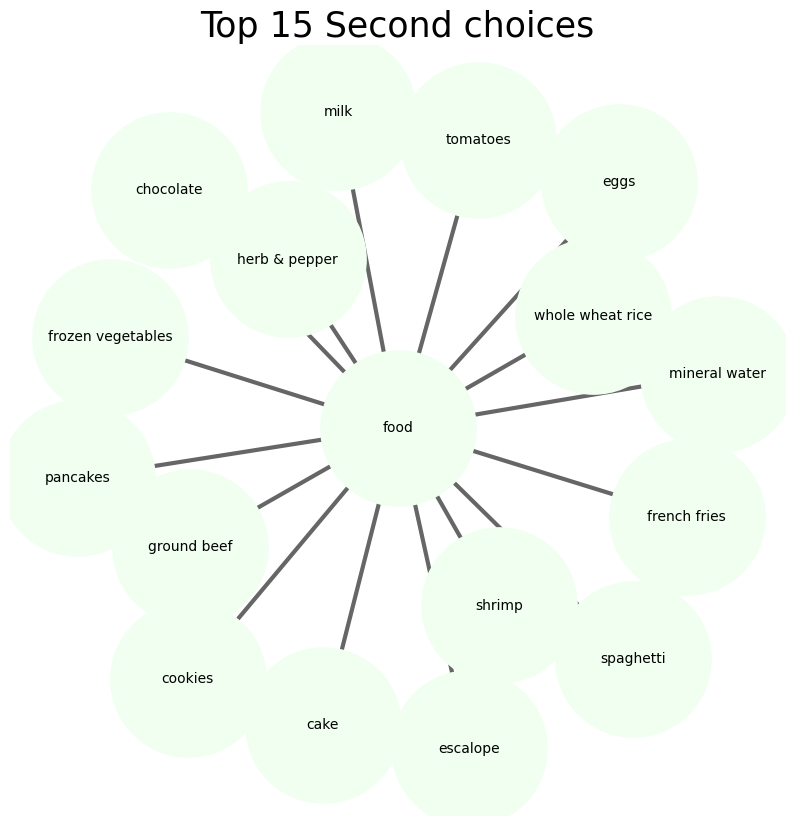

In [56]:
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,10)
second_choice = nx.from_pandas_edgelist(df_table_second, source = 'food', target = "items", edge_attr = True)
pos = nx.spring_layout(second_choice)
nx.draw_networkx_nodes(second_choice, pos, node_size = 12500, node_color = "honeydew")
nx.draw_networkx_edges(second_choice, pos, width = 3, alpha = 0.6, edge_color = 'black')
nx.draw_networkx_labels(second_choice, pos, font_size = 10, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 Second choices', fontsize=25)
plt.show()

In [57]:
# 1. Gather Only Third Choice of Each Transaction into Numpy Array
## For Column "2"
transaction = []
for i in range(0, data.shape[0]):
    transaction.append(data.values[i,2])

transaction = np.array(transaction)

# 2. Transform Them a Pandas DataFrame
df_third = pd.DataFrame(transaction, columns=["items"]) # Transaction Item Name
df_third["incident_count"] = 1 # Put 1 to Each Item For Making Countable Table, Group By Will Be Done Later On

# 3. Delete NaN Items from Dataset
indexNames = df_third[df_third['items'] == "nan" ].index
df_third.drop(indexNames , inplace=True)

# 4. Final Step: Make a New Appropriate Pandas DataFrame for Visualizations  
df_table_third = df_third.groupby("items").sum().sort_values("incident_count", ascending=False).reset_index()
df_table_third["food"] = "food"
df_table_third = df_table_third.truncate(before=-1, after=15) # Fist 15 Choice

In [58]:
fig = go.Figure(data=[go.Bar(x=df_table_third["items"],y=df_table_third["incident_count"],
                             hovertext=df_table_third["items"], text=df_table_third["incident_count"], textposition="outside")])
fig.update_traces(marker_color='rgb(158,202,225)',marker_line_color='rgb(8,48,107)',
                  marker_line_width = 1.5, opacity = 0.65)
fig.update_layout(title_text='Customers Third choices',template = 'plotly_dark',)
fig.show()

### **Data Preprocessing**

**In order to be able to use apriori algorithm and get most frequent itemsets, we have to transform our dataset into a 1 – 0 matrix where rows are transactions and columns are products. In that matrix, “1” should be encoded if the product has been bought on that transaction and “0” should be encoded if the product has not been bought on that transaction. This preprocessing is required for use of the algorithm.**

In [59]:
# Transform Every Transaction to Seperate List & Gather Them into Numpy Array
transaction = []
for i in range(0,data.shape[0]):
  transaction.append([str(data.values[i,j]) for j in range(0,data.shape[1])])

transaction = np.array(transaction)
transaction[1]

array(['burgers', 'meatballs', 'eggs', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', 'nan'], dtype='<U20')

In [60]:
te = TransactionEncoder()
te_ary = te.fit(transaction).transform(transaction)
dataset = pd.DataFrame(te_ary,columns=te.columns_)
dataset

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,escalope,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,

In [61]:
dataset.shape

(7501, 120)

**We have 121 columns/features at the moment. Extracting the most frequent itemsets from 121 feature would be compelling for a start
From that reason, we will start with Top 50 items which are already illustrated in Section-3**



In [62]:
first50 = df_table["items"].head(50)
dataset = dataset.loc[:,first50]
dataset

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes,olive oil,frozen smoothie,turkey,chicken,whole wheat rice,grated cheese,cooking oil,soup,herb & pepper,honey,champagne,fresh bread,salmon,brownies,avocado,hot dogs,cottage cheese,tomato juice,butter,whole wheat pasta,red wine,yogurt cake,light mayo,ham,energy bar,energy drink,pepper,cereals,vegetables mix,muffins,oil,french wine,fresh tuna
0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,True,False,True,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False
7497,False,True,False,True,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [63]:
dataset.columns

Index(['mineral water', 'eggs', 'spaghetti', 'french fries', 'chocolate',
       'green tea', 'milk', 'ground beef', 'frozen vegetables', 'pancakes',
       'burgers', 'cake', 'cookies', 'escalope', 'low fat yogurt', 'shrimp',
       'tomatoes', 'olive oil', 'frozen smoothie', 'turkey', 'chicken',
       'whole wheat rice', 'grated cheese', 'cooking oil', 'soup',
       'herb & pepper', 'honey', 'champagne', 'fresh bread', 'salmon',
       'brownies', 'avocado', 'hot dogs', 'cottage cheese', 'tomato juice',
       'butter', 'whole wheat pasta', 'red wine', 'yogurt cake', 'light mayo',
       'ham', 'energy bar', 'energy drink', 'pepper', 'cereals',
       'vegetables mix', 'muffins', 'oil', 'french wine', 'fresh tuna'],
      dtype='object')

In [64]:
def encode_units(x):
  if x == False:
    return 0
  else:
    return 1

dataset = dataset.applymap(encode_units)
dataset.head(10)

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes,burgers,cake,cookies,escalope,low fat yogurt,shrimp,tomatoes,olive oil,frozen smoothie,turkey,chicken,whole wheat rice,grated cheese,cooking oil,soup,herb & pepper,honey,champagne,fresh bread,salmon,brownies,avocado,hot dogs,cottage cheese,tomato juice,butter,whole wheat pasta,red wine,yogurt cake,light mayo,ham,energy bar,energy drink,pepper,cereals,vegetables mix,muffins,oil,french wine,fresh tuna
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **Algorithm Implementation**


**Support:**
Support is an indication of how frequently the itemset appears in the dataset.In other words, this is an indication of how popular an itemset is in a dataset

**Confidence:**
Confidence is an indication of how often the rule has been found to be true
In other words, confidence says how likely item Y is purchased when item X is purchased

**Lift:**
Lift is a metric to measure the ratio of X and Y occur together to X and Y occurrence if they were statistically independent. In other words, lift illustrates how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is.

A Lift score that is close to 1 indicates that the antecedent and the consequent are independent and occurrence of antecedent has no impact on occurrence of consequent.

A Lift score that is bigger than 1 indicates that the antecedent and consequent are dependent to each other, and the occurrence of antecedent has a positive impact on occurrence of consequent.

A Lift score that is smaller than 1 indicates that the antecedent and the consequent are substitute each other that means the existence of antecedent has a negative impact to consequent or visa versa.

**Conviction:**
Conviction measures the implication strength of the rule from statistical independence Conviction score is a ratio between the probability that X occurs without Y while they were dependent and the actual probability of X existence without Y. For instance; if (French fries) --> (beer) association has a conviction score of 1.8; the rule would be incorrect 1.8 times as often (80% more often) if the association between totally independent.

**Antecedent & Consequent:**
The IF component of an association rule is known as the antecedent. The THEN component is known as the consequent. The antecedent and the consequent are disjoint; they have no items in common.

## **Implementation:**

In [65]:
frequent_itemsets = apriori(dataset,min_support=0.01,use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.238368,(mineral water),1
1,0.179709,(eggs),1
2,0.174110,(spaghetti),1
3,0.170911,(french fries),1
4,0.163845,(chocolate),1
...,...,...,...
227,0.010932,"(mineral water, ground beef, chocolate)",3
228,0.011065,"(mineral water, ground beef, milk)",3
229,0.011065,"(mineral water, frozen vegetables, milk)",3
230,0.010532,"(spaghetti, eggs, chocolate)",3


In [66]:
frequent_itemsets[(frequent_itemsets['length'] == 2) & (frequent_itemsets['support'] >= 0.05)]

,support,itemsets,length
50,0.050927,"(mineral water, eggs)",2
51,0.059725,"(mineral water, spaghetti)",2
53,0.052660,"(mineral water, chocolate)",2


In [67]:
frequent_itemsets[(frequent_itemsets['length'] == 3)].head()

,support,itemsets,length
215,0.014265,"(mineral water, spaghetti, eggs)",3
216,0.013465,"(mineral water, eggs, chocolate)",3
217,0.013065,"(mineral water, eggs, milk)",3
218,0.010132,"(mineral water, eggs, ground beef)",3
219,0.010132,"(mineral water, french fries, spaghetti)",3


**we will use the extracted frequent itemsets in rule creation**

      We set our metric as "Lift" to define whether antecedents & consequents are dependent our not.
      Treshold is selected as "1.2" since it is required to have lift scores above than 1 if there is dependency.

In [68]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.2)
rules["antecedents_length"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_length"] = rules["consequents"].apply(lambda x: len(x))
rules.sort_values('lift', ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
218,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
219,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
293,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
288,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445,2,1
307,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021,2,1
...,...,...,...,...,...,...,...,...,...,...,...
60,(low fat yogurt),(eggs),0.076523,0.179709,0.016798,0.219512,1.221484,0.003046,1.050997,1,1
164,(shrimp),(green tea),0.071457,0.132116,0.011465,0.160448,1.214449,0.002025,1.033747,1,1
165,(green tea),(shrimp),0.132116,0.071457,0.011465,0.086781,1.214449,0.002025,1.016780,1,1
122,(escalope),(french fries),0.079323,0.170911,0.016398,0.206723,1.209537,0.002841,1.045145,1,1


**According to above table, we can easily say that the dependency between (herb & pepper) and (ground beef) is high since lift score is approximately 2.5x of threshold and the confidence score is promising (32%)**

In [69]:
rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
268,"(eggs, ground beef)",(mineral water),0.019997,0.238368,0.010132,0.506667,2.125563,0.005365,1.543848,2,1
326,"(milk, ground beef)",(mineral water),0.021997,0.238368,0.011065,0.503030,2.110308,0.005822,1.532552,2,1
320,"(chocolate, ground beef)",(mineral water),0.023064,0.238368,0.010932,0.473988,1.988472,0.005434,1.447937,2,1
332,"(frozen vegetables, milk)",(mineral water),0.023597,0.238368,0.011065,0.468927,1.967236,0.005440,1.434136,2,1
35,(soup),(mineral water),0.050527,0.238368,0.023064,0.456464,1.914955,0.011020,1.401255,1,1
...,...,...,...,...,...,...,...,...,...,...,...
321,(mineral water),"(chocolate, ground beef)",0.238368,0.023064,0.010932,0.045861,1.988472,0.005434,1.023893,1,2
48,(mineral water),(cereals),0.238368,0.025730,0.010265,0.043065,1.673729,0.004132,1.018115,1,1
309,(mineral water),"(olive oil, spaghetti)",0.238368,0.022930,0.010265,0.043065,1.878079,0.004799,1.021041,1,2
274,(mineral water),"(french fries, spaghetti)",0.238368,0.027596,0.010132,0.042506,1.540263,0.003554,1.015571,1,2


**According to above table, the customers who bought (eggs, ground beef) is expected to buy (mineral water) with a likelihood of 50% (confidence). Lift & conviction scores support that hypothesis too**

-It would be better to keep them together to increase sales

**Since the most demanded product is mineral water in the dataset, the association results are mainly dominated by it. From that reason, to get more insights, it’s better to create a confidence table excluding the mineral water**

In [70]:
rules[~rules["consequents"].str.contains("mineral water", regex=False) & 
      ~rules["antecedents"].str.contains("mineral water", regex=False)].sort_values("confidence",ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
75,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
110,(red wine),(spaghetti),0.028130,0.174110,0.010265,0.364929,2.095966,0.005368,1.300468,1,1
88,(olive oil),(spaghetti),0.065858,0.174110,0.022930,0.348178,1.999758,0.011464,1.267048,1,1
343,"(chocolate, milk)",(spaghetti),0.032129,0.174110,0.010932,0.340249,1.954217,0.005338,1.251821,2,1
57,(burgers),(eggs),0.087188,0.179709,0.028796,0.330275,1.837830,0.013128,1.224818,1,1
105,(herb & pepper),(spaghetti),0.049460,0.174110,0.016264,0.328841,1.888695,0.007653,1.230543,1,1
218,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860,1,1
338,"(eggs, chocolate)",(spaghetti),0.033196,0.174110,0.010532,0.317269,1.822232,0.004752,1.209686,2,1
108,(salmon),(spaghetti),0.042528,0.174110,0.013465,0.316614,1.818472,0.006060,1.208527,1,1
98,(grated cheese),(spaghetti),0.052393,0.174110,0.016531,0.315522,1.812196,0.007409,1.206597,1,1


**According to mineral water excluded table above, we can say that there is a significant relationship between ground beef and spaghetti, red wine and spaghetti. Lift and conviction scores supports that too**

**As you might have noticed, ground beef is on the top in both mineral water included and excluded table. From that reason, in order to catch new associations related to ground beef and boost the sales, let’s look into associations where ground beef is antecedent.**

In [71]:
rules[rules["antecedents"].str.contains("ground beef", regex=False) & rules["antecedents_length"] == 1].sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_length,consequents_length
7,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401,1,1
75,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997,1,1
128,(ground beef),(chocolate),0.098254,0.163845,0.023064,0.234735,1.432669,0.006965,1.092635,1,1
174,(ground beef),(milk),0.098254,0.129583,0.021997,0.223881,1.727704,0.009265,1.121499,1,1
293,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902,1,2
205,(ground beef),(frozen vegetables),0.098254,0.095321,0.016931,0.172320,1.807796,0.007565,1.093031,1,1
219,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410,1,1
207,(ground beef),(pancakes),0.098254,0.095054,0.014531,0.147897,1.555925,0.005192,1.062015,1,1
215,(ground beef),(olive oil),0.098254,0.065858,0.014131,0.143826,2.183889,0.007661,1.091066,1,1
209,(ground beef),(burgers),0.098254,0.087188,0.011998,0.122117,1.400607,0.003432,1.039787,1,1
